In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('Dry_Bean_Dataset.csv')
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import uniform, reciprocal
from sklearn.svm import NuSVC 
from sklearn.metrics import accuracy_score

best_accuracy = []
best_kernel = []
best_nu = []
best_gamma = []
models = []
params = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 
    'nu' : uniform(0.05, 0.05), 
    'gamma' : reciprocal(0.001, 10), 
}

In [5]:
import warnings
from sklearn.exceptions import FitFailedWarning

warnings.filterwarnings("ignore", category = FitFailedWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [6]:
best_acc = -9999
for i in range(10):
    data_sample = dataset.sample(frac = 0.1, replace = True)
    X = data_sample.iloc[:, :-1].values 
    y = data_sample.iloc[:, -1].values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model = NuSVC(class_weight = 'balanced')
    search = RandomizedSearchCV(
        estimator = model, 
        param_distributions = params, 
        n_iter = 100, 
        scoring = 'accuracy', 
        random_state = 42, 
        verbose = 1, 
        n_jobs = -1, 
        error_score = np.nan 
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    y_pred = best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = search.best_params_['kernel']
    n = search.best_params_['nu']
    g = search.best_params_['gamma']

    if accuracy > best_acc: 
        data = data_sample 
        best_acc = accuracy
    
    best_accuracy.append(accuracy)
    best_kernel.append(k)
    best_nu.append(n)
    best_gamma.append(g)
    models.append(best)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [7]:
results1 = pd.DataFrame({
    'Sample' : ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10'], 
    'Best Accuracy' : best_accuracy, 
    'Best Kernel' : best_kernel, 
    'Best Nu' : best_nu, 
    'Best gamma' : best_gamma, 
})
results1.to_csv('results.csv')
results1

,Sample,Best Accuracy,Best Kernel,Best Nu,Best gamma
0,S1,0.907090,rbf,0.088994,2.662546
1,S2,0.889976,poly,0.066951,3.392699
2,S3,0.919315,poly,0.066951,3.392699
3,S4,0.936430,poly,0.072803,7.852755
4,S5,0.894866,poly,0.066951,3.392699
5,S6,0.907090,rbf,0.072488,7.556810
6,S7,0.904645,rbf,0.088994,2.662546
7,S8,0.924205,rbf,0.084815,7.076022
8,S9,0.904645,poly,0.084035,4.295993
9,S10,0.909535,rbf,0.088994,2.662546


In [8]:
cond = results1['Best Accuracy'] == max(results1['Best Accuracy'])
best_model = models[np.where(cond)[0][0]]

In [9]:
best_model

NuSVC(class_weight='balanced', gamma=np.float64(7.8527554947242555),
      kernel='poly', nu=np.float64(0.0728034992108518))

In [10]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

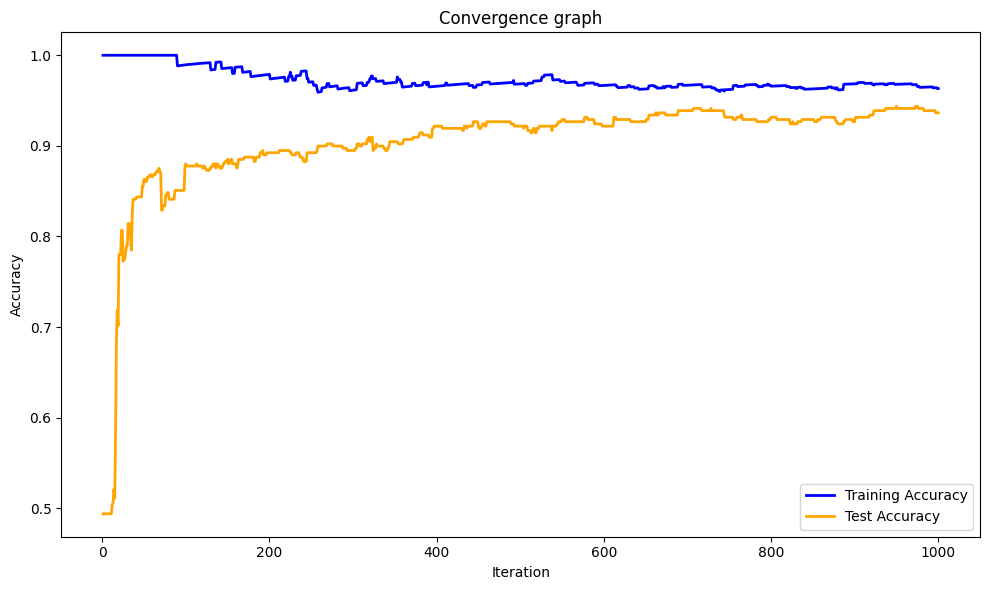

In [12]:
train_accuracies = []
test_accuracies = []
iterations = range(1, 1001)
for i in iterations:
    frac = i / 1000
    idx = max(10, int(len(X_train) * frac))
    X_sub, y_sub = X_train[:idx], y_train[:idx]

    best_model.fit(X_sub, y_sub)

    train_acc = accuracy_score(y_sub, best_model.predict(X_sub))
    train_accuracies.append(train_acc)

    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
plt.plot(iterations, test_accuracies, label='Test Accuracy', color='orange', linewidth=2)
plt.title('Convergence graph')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('convergence.png')
plt.show()